<a href="https://colab.research.google.com/github/JonathanDorsey2/DS1002/blob/main/(March%2018)%20Data%20Deep%20Cleaning%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pandas Data Cleaning

```
  University of Virginia
  DS1002: Programming for Data Science
```

## PREREQUISITES
- data types
- pandas dataframes

## OBJECTIVES
- Deal with issues with numerical, text, and categorical data

In [1]:
import pandas as pd
import numpy as np

## Working with duplicate data

Pandas can identify duplicate rows and duplicate columns within a DataFrame.

Find the file `dupe-vals.csv` in the `data/` folder on GitHub.

In [2]:
dupes = pd.read_csv('./dupe-vals.csv')

In [3]:
dupes.duplicated()
#Returns booleans: False and True
#Returns False for values it's seen the first time
#Returns True for values it's seen before

0      False
1      False
2      False
3      False
4      False
       ...  
116     True
117     True
118     True
119     True
120     True
Length: 121, dtype: bool

In [6]:
# let's get a total of how many rows are duplicate
print(dupes.duplicated().sum())


21


In [7]:
# remove the duplicate rows - but be sure to keep one copy!
dupes = dupes.drop_duplicates()

# Working with Missing Data

Pandas primarily uses the data type `np.nan` from NumPy to represent missing data.


In [8]:
df_miss = pd.DataFrame({
    'x':[2, np.nan, 1],
    'y':[np.nan, np.nan, 6],
    'z':[4, np.nan, np.nan]}
)

In [18]:
df_miss

,x,y,z
0,2.0,NaN,4.0
1,NaN,NaN,NaN
2,1.0,6.0,NaN


## `.dropna()`

This will drop all rows with missing data in any column.

[Details](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html)

In [14]:
df_drop_all = df_miss.dropna()  #Drops all ROWS with np.nan
df_drop_all

,x,y,z


The `subset` parameter takes a list of column names to specify which columns should have missing values.

In [19]:
df_drop_x = df_miss.dropna(subset=['x'])
df_drop_x

,x,y,z
0,2.0,NaN,4.0
2,1.0,6.0,NaN


## `.fillna()`

This will replace missing values with whatever you set it to, e.g. $0$s.

[Details](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html)

We can pass the results of an operation -- for example to peform simple imputation, we can replace missing values in each column with the median value of the respective column:

In [20]:
df_filled = df_miss.fillna(df_miss.median())

In [21]:
df_filled

,x,y,z
0,2.0,6.0,4.0
1,1.5,6.0,4.0
2,1.0,6.0,4.0


# Try It Yourself

Fetch the `very-messy-data.csv` file from the `data/` folder on GitHub, and drag it into the files of this notebook.

Using the methods you learned above, practice your skills by doing the following:

1. Remove duplicate lines
2. Where you are missing species data, remove those lines.
3. Where you are missing other data, impute data based on the mean of the rest of that column. Repeat for any columns with missing data.

In [ ]:
verymessy = pd.read_csv("./very-messy-data.csv")

In [ ]:
cleaner = verymessy.drop_duplicates()
cleanerer = cleaner.dropna(subset = ['species'])
cleanest = cleanerer.fillna(cleanerer.mean())
cleanest

## Data Type Constraints

We need to make sure our variables have the correct data types, other wise we risk compromising our analysis.

Example:


In [24]:
# import `sales.csv`
sales = pd.read_csv('https://ds1002-resources.s3.amazonaws.com/data/sales.csv')
sales.head(2)


,SalesOrderID,Revenue,Quantity
0,43659,23153$,12
1,43660,1457$,2


We want to calculate total revenue.

In [ ]:
sales['Revenue'].sum() #this will output a wierd answer

This produces some sort of numerical/repeating error we need to solve. Let's examine the data types of the columns.

In [ ]:
sales.dtypes

SalesOrderID     int64
Revenue         object
Quantity         int64
dtype: object

And next let's look at some rows to see what we find.

In [ ]:
sales.head(20)

,SalesOrderID,Revenue,Quantity
0,43659,23153$,12
1,43660,1457$,2
2,43661,3857$,3
3,43662,15748$,8
4,43663,18067$,10
5,43664,5978$,4
6,43665,2985$,3
7,43666,28567$,15
8,43667,9865$,6
9,43668,2314$,3


In [44]:
# remove $ from Revenue columns
sales['Revenue'] = sales['Revenue'].str.strip('$')  #the .strip() function is a method for the string object
sales['Revenue'] = sales['Revenue'].astype('int') #the  astype() turns the STRING to an INTEGER

In [45]:
sales.head(5)

,SalesOrderID,Revenue,Quantity
0,43659,23153,12
1,43660,1457,2
2,43661,3857,3
3,43662,15748,8
4,43663,18067,10


In [46]:
sales.dtypes

SalesOrderID    int64
Revenue         int64
Quantity        int64
dtype: object

In [47]:
# verify that Revenue is now an integer
sales['Revenue'].dtype == 'int'

True

In [49]:
sales['Revenue'].sum()

162480

## Numeric or categorical data

Example:

In [51]:
# import `marriage_status.csv`
marriage_status = pd.read_csv('https://ds1002-resources.s3.amazonaws.com/data/marriage_status.csv')
marriage_status.head(-1)

,marriage_status
0,divorced
1,separated
2,married
3,UNMARRIED
4,MARRIED
5,MARRIED
6,married
7,unmarried
8,UNMARRIED
9,divorced


`0` = Never Married
`1` = Married
`2` = Separated
`3` = Divorced

In [52]:
marriage_status.head(50)

,marriage_status
0,divorced
1,separated
2,married
3,UNMARRIED
4,MARRIED
5,MARRIED
6,married
7,unmarried
8,UNMARRIED
9,divorced


In [53]:
marriage_status['marriage_status'].describe()

count          21
unique          6
top       married
freq            6
Name: marriage_status, dtype: object

<!-- Calculated as a numeric variables when in reality a categorical.  

Let's change the the data type to `categorical`
-->

In [54]:
marriage_status['marriage_status'] = marriage_status['marriage_status'].astype('category')
#what is 'category'?

In [ ]:
marriage_status.describe()

,marriage_status
count,21
unique,6
top,married
freq,6


In [55]:
marriage_status.dtypes

marriage_status    category
dtype: object

Pandas now gives summary outputs consistent with a `categorical` variable.

Now let's udpate the values in that column for consistency.

In [56]:
marriage_status["marriage_status"] = marriage_status["marriage_status"].str.lower()

In [59]:
marriage_status['marriage_status'].to_frame()

,marriage_status
0,divorced
1,separated
2,married
3,unmarried
4,married
5,married
6,married
7,unmarried
8,unmarried
9,divorced


In [57]:
marriage_status.describe()

,marriage_status
count,21
unique,4
top,married
freq,8


This got us from 6 to the 4 unique values we want (unmarried, married, separated, divorced)

## Out of Range Data

Out of range data can occur from human error, data collection error, etc.   

Let's work through a couple examples

**`Movie Ratings`**  

consists of `name`, `year`, and `score` (0-10)  

**`User Signups`**  

consists of `subscription_date`, `user_name`, `country`  

In [63]:
# import movie_ratings.csv
movies = pd.read_csv('https://ds1002-resources.s3.amazonaws.com/data/movies.csv')
movies.head(2)

,Name,Year,Score
0,Twleve Angry Men,1957,8.9
1,Alien,1979,8.4


Text(0.5, 1.0, 'Average rating of top 50 movies (0-10')

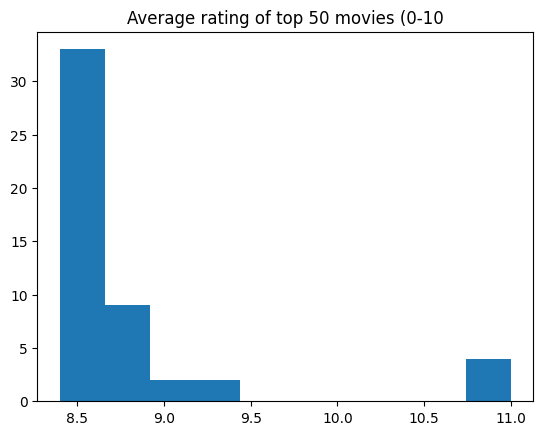

In [64]:
# data viz
import matplotlib.pyplot as plt
plt.hist(movies['Score'])
plt.title('Average rating of top 50 movies (0-10')

In [65]:
# import `user_signups`
users = pd.read_csv('https://ds1002-resources.s3.amazonaws.com/data/user_signups.csv')
users.tail()

,subscription_date,user_name,country
7,7/3/23,Leo,USA
8,5/1/23,Marc,USA
9,10/10/23,Lou,USA
10,11/15/23,Sheng,USA
11,12/3/23,Nancy,USA


In [66]:
users.dtypes
#We would like the subscription_date column to not be a 'string', but a date object itself

subscription_date    object
user_name            object
country              object
dtype: object

In [69]:
#import datetime
#This is a package for dealing with calendar dates
import datetime as dt

#convert object to date or datetime
users['subscription_date'] = pd.to_datetime(users['subscription_date'])
users.dtypes

#datetime has 40 different formats, just for calendar dates

subscription_date    datetime64[ns]
user_name                    object
country                      object
dtype: object

In [73]:
users.head()
#The conversion changed the format of the subscription_date values

,subscription_date,user_name,country
0,2021-01-05,Mariah,USA
1,2020-09-09,Joshua,USA
2,2020-04-01,Heidi,USA
3,2020-11-10,Christine,USA
4,2020-11-07,Ayanna,USA


In [71]:
#convert object to date
users['subscription_date'] = pd.to_datetime(users['subscription_date']).dt.date
users.dtypes

subscription_date    object
user_name            object
country              object
dtype: object

In [72]:
today_date = dt.date.today()
users[users['subscription_date'] > today_date]

,subscription_date,user_name,country


## How to deal without out of range data


1. Drop data
 - not advised unless very small propotion of data
 - may be removing otherwise important data

2. Treat data as missing
- can then impute data

3. Set a custom value depending on the business assumptions

**always document decision and steps!**

In [74]:
# Let's look at the `movies` df
movies[movies['Score'] > 10]

,Name,Year,Score
6,Fight Club,1999,11.0
12,Inception,2010,11.0
22,Pulp Fiction,1994,11.0
40,The Lord of the Rings: The Fellowship of the Ring,2001,11.0


## Dropping the values

In [75]:
# by filtering
movies1 = movies[movies.Score <= 10]

#check that values were dropped
movies1.sort_values(['Score'], ascending = False).head()

,Name,Year,Score
46,The Shawshank Redemption,1994,9.2
34,The Godfather,1972,9.2
32,The Dark Knight,2008,9.0
35,The Godfather Part II,1974,9.0
0,Twleve Angry Men,1957,8.9


In [76]:
# with .drop() function
movies2 = movies.drop(movies[movies['Score'] > 10].index)
movies2.sort_values('Score', ascending = False).head()

,Name,Year,Score
46,The Shawshank Redemption,1994,9.2
34,The Godfather,1972,9.2
32,The Dark Knight,2008,9.0
35,The Godfather Part II,1974,9.0
0,Twleve Angry Men,1957,8.9


In [81]:
# convert Score > 10 to 10
movies.loc[movies['Score']> 10, 'Score'] = 10

assert movies['Score'].max() <= 10

## Categorical Data & Membership Constraints

- Has a predefined set of categories

- Value can only be one of the membership categories

- Often coded as numbers for further analysis techniques (like machine learning)

### Concerns in categorical data

1. Errors occur when observations have values that go beyond the predefined catogories

2. Errors also occur with inconsistent fields

3. Needing to collapse categories

4. Data type not being defined as 'category'

### Fixing observations that go beyond predefined categories

- We can drop, remap, or infer categories to fix

- Here is more complex example:

In [ ]:
# import csv's

study = pd.read_csv('https://ds1002-resources.s3.amazonaws.com/data/study.csv')
categories = pd.read_csv('https://ds1002-resources.s3.amazonaws.com/data/blood_categories.csv')

In [ ]:
study

In [ ]:
categories

We can check for errors with using joins.

![](https://ds1002-resources.s3.amazonaws.com/images/joins.png)

**So a left anti join between study and categories would give us this:**

![](https://ds1002-resources.s3.amazonaws.com/images/antijoin.png)

**An inner join between study and category would give us:**

![](https://ds1002-resources.s3.amazonaws.com/images/innerjoin.png)

**Let's do this in python**

**`.set()`**  
**`.difference()`**

[Geeks for Geeks](https://www.geeksforgeeks.org/python-set-difference/)

*Note: these are from python not pandas*

In [ ]:
# find inconsistent categories

inconsistent_categories = set(study['blood_type']).difference(categories['blood_type'])
inconsistent_categories

In [ ]:
# find inconsistent rows

inconsistent_rows = study['blood_type'].isin(inconsistent_categories) # gives a boolean series
study[inconsistent_rows] # subset study dataframe based on boolean values

In [ ]:
# one way to drop inconsistent rows (other ways in pandas cleaning I)
consistent_data = study[~inconsistent_rows]
consistent_data

### Fixing value inconsistency

In [ ]:
# import `marriage_status` dataset
marriage = pd.read_csv('https://ds1002-resources.s3.amazonaws.com/data/marriage_status.csv')

In [ ]:
marriage.head()

In [ ]:
marriage['marriage_status'].value_counts()

For this example we can either capitalize or lowercase the values:

In [ ]:
# Capitalize
marriage['marriage_status'] = marriage['marriage_status'].str.upper()
marriage['marriage_status'].value_counts()

In [ ]:
# Lowercase
marriage['marriage_status'] = marriage['marriage_status'].str.lower()
marriage['marriage_status'].value_counts()


### Collapsing data into categories

* Often we will need to distill continuous data into categories
* Categories should have evidence-based backing behing them
* Cateogires can increase interpretability but can also lose valuable information

In [ ]:
income = pd.read_csv('https://ds1002-resources.s3.amazonaws.com/data/income.csv')


**`.qcut()`**

* automatically divides data into categories based on the argument `q` and the distribution of data

In [ ]:
group_names = ['0-100K', '100K-250K', '250K-500K', '500K+']
income['income_group'] = pd.qcut(income['household_income'], q = 4,
                                     labels = group_names)

income[['income_group', 'household_income']]

**`.cut()`**

* Allows you to use categories cut-off ranges with the `bins` arguement

In [ ]:
ranges = [0, 100000, 500000, np.inf]
group_names = ['0-100K', '100K-500K', '500K+']
income['income_group'] = pd.cut(income['household_income'], bins = ranges,
                                     labels = group_names)

income[['income_group', 'household_income']]

## Map categories into fewer ones

In [ ]:
computer = pd.read_csv('https://ds1002-resources.s3.amazonaws.com/data/computer.csv')

We want to collapse the `operating system` column into `'DesktopOS', 'MobileOS'`

In [ ]:
# create dictionary
mapping = {'Microsoft': 'DesktopOS', 'MacOS': 'DesktopOS', 'Linux': 'DesktopOS', 'IOS': 'MobileOS', 'Android': 'MobileOS'}

# use `.replace`
computer['operating_system_category'] = computer['operating_system'].replace(mapping)
computer['operating_system_category'].unique()

In [ ]:
computer.head()

## Text Data

* Common type of data

* Common text data problems are:
1) data inconsistency
2) fixed length violations
3) typos

In [ ]:
phones = pd.read_csv('https://ds1002-resources.s3.amazonaws.com/data/phone_numbers.csv')
phones

Ideally we want to remove dashes, have each phone number start with the full country code, and remove phone numbers that don't have full values listed.

In [ ]:
# Replace the '+' with '00'
phones['phone_number'] = phones['phone_number'].str.replace('+', '00')
phones

In [ ]:
# Replace the '-' with nothing
phones['phone_number'] = phones['phone_number'].str.replace('-', '')
phones

In [ ]:
# Replace phone numbers with lower than 10 digits to NaN
digits = phones['phone_number'].str.len() # gets the length of the each phone number
phones.loc[digits < 10, 'phone_number'] = np.nan # subset phone numbers with less than 10 digits, replace with NaN
phones

In [ ]:
# checking data with assert statements

# find length of each row in phone_number columns
sanity_check = phones['phone_number'].str.len()

# assert minimum phone_number lenth is 10
assert sanity_check.min() >= 10

# assert all number do not have a '+' or '-'
assert phones['phone_number'].str.contains('+|-').any() == False

In [ ]:
phones

### More complicated regular expression (`regex`) examples

* Regular expressions give us the ability to search for any pattern in text data, like only digits for example

* They are like control + find in your browser, but more dynamic and robust

[regex blog](https://www.analyticsvidhya.com/blog/2021/07/regular-expressions-in-python-a-beginners-guide/)

In [ ]:
phones_complex = pd.read_csv('https://ds1002-resources.s3.amazonaws.com/data/phone_numbers_complex.csv')
phones_complex

In [ ]:
# replace letters with nothing

phones_complex['phone_number'] = phones_complex['phone_number'].str.replace(r'\D+', '') #\D+ mean anything that is not a digit, found in regex library
phones_complex

## Data Uniformity

* We want data within columns to have the same units (temperature, weight, money)

* Or data, as as dates, to have the same format

In [ ]:
temps = pd.read_csv('https://ds1002-resources.s3.amazonaws.com/data/temperatures.csv')
temps.head()

**Let's look at graph**

In [ ]:
# import matplotlib
import matplotlib.pyplot as plt

# create a scatter plot
plt.scatter(x = 'date', y = 'temperature', data = temps)

# create title, xlabel, and ylabel
plt.title('Temperatures in Celsius March 2019 - NYC')
plt.xlabel('date')
plt.ylabel('temperature (degrees Celsius)')
plt.xticks(rotation = 90)

# show plot
plt.show()

**Convert farhenheit data to celsius**

In [ ]:
temp_fah = temps.loc[temps['temperature'] > 40, 'temperature'] # use .loc to subset data above 40

temp_cels = (temp_fah - 32) * (5/9) # convert to celsius

temps.loc[temps['temperature'] > 40, 'temperature'] = temp_cels

In [ ]:
# import matplotlib
import matplotlib.pyplot as plt

# create a scatter plot
plt.scatter(x = 'date', y = 'temperature', data = temps)

# create title, xlabel, and ylabel
plt.title('Temperatures in Celsius March 2019 - NYC')
plt.xlabel('date')
plt.ylabel('temperature (degrees Celsius)')
plt.xticks(rotation = 90)

# show plot
plt.show()

**Clean-up Dates**

In [ ]:
birthdays = pd.read_csv('https://ds1002-resources.s3.amazonaws.com/data/birthdays.csv')
birthdays.head()

The `datetime` package is useful for representing dates

[How to format dates in python](https://stackabuse.com/how-to-format-dates-in-python/)

We also use `pandas.to_datetime`
* can recognize more formats automatically
* sometimes fails with erroneous or unrecongizable formats

In [ ]:
# converts to datetime
birthdays['birth_date'] = pd.to_datetime(birthdays['birth_date'])

**Doesn't work!**

try:

In [ ]:
birthdays['birth_date'] = pd.to_datetime(birthdays['birth_date'],
                                        # attempt to infer format for each date
                                        infer_datetime_format = True,
                                        # return NA for rows where conversion failed
                                        errors = 'coerce')

In [ ]:
birthdays.head()

In [ ]:
birthdays['birth_date'] = birthdays['birth_date'].dt.strftime('%d-%m-%Y')
birthdays.head()

**Ambiguous Data**

Is `2019-03-08` in August or March?

* Can covnert to `NA` or treat accordingly
* Can infer - this is where knowing your data is useful